In [21]:
import nistchempy as nist
import matplotlib.pyplot as plt
import numpy as np

In [89]:
def get_spec(name: str):
    '''
    calls the NIST webbook for an IR spectrum based on a name

    Args:
        name: the name of the molecule to search
    Returns:
        img: the plot of the IR spectrum
    '''
    mol_search = nist.run_search(name, 'name')
    num_results = len(mol_search.compounds)
    print(f'Retrieved {num_results} compounds.')
    got_spectrum  = False
    if num_results > 0:
        mol_to_try = 0
        while (got_spectrum == False) and mol_to_try <= num_results:
            print(f'Getting spectrum for {mol_to_try+1} result.')
            try:
                mol_search.compounds[mol_to_try].get_ir_spectra()
                spectrum = mol_search.compounds[0].ir_specs[0]
                spec_file = spectrum.jdx_text
                spec_lines = spec_file.split('\n')
    
                for i,line in enumerate(spec_lines):
                    if '##XYDATA' in line:
                        start_idx = i+1
                    elif '##END' in line:
                        end_idx = i
                    elif 'XFACTOR' in line:
                        x_factor = float(line.split('=')[1])
                    elif 'YFACTOR' in line:
                        y_factor = float(line.split('=')[1])
                print(f'start is {start_idx} and end is {end_idx}.')
                print(f'x multiplier is {x_factor} and y multiplier is {y_factor}.')
                
                spacing = float(spec_lines[start_idx+1].split(' ')[0]) - float(spec_lines[start_idx].split(' ')[0])
                spacing /= (len(spec_lines[start_idx+1].split(' '))-1)
                print(f'spacing between lines is {spacing}.')
    
                X_list = []
                y_list = []
                for line in spec_lines[start_idx:end_idx]:
                    parts = line.split(' ')
                    parts = [float(x) for x in parts]
                    
                    first_x = parts[0]
                    for i, peak in enumerate(parts[1:]):
                        current_x = first_x + i*spacing
                        X_list.append(current_x*x_factor)
                        y_list.append(peak*y_factor)
    
                plt.plot(X_list, y_list)
                plt.xlim(X_list[0]-10*spacing, X_list[-1]+10*spacing)
                plt.ylim(0, y_list[np.argmax(y_list)])
                plt.gca().invert_xaxis() 
                plt.xlabel("Wavenumber (cm$^{-1}$)")
                plt.ylabel("Absorbance")
                plt.title(f"{name} IR Spectrum")
                img = plt.show()     
                got_spectrum == True

                return img
            except:
                mol_to_try += 1
                print('Could not fetch spectrum')
    else:
        print('Could not find that molecule.')

Retrieved 1 compounds.
Getting spectrum for 1 result.
start is 25 and end is 113.
x multiplier is 1.0 and y multiplier is 5.5371e-05.
spacing between lines is 4.0.


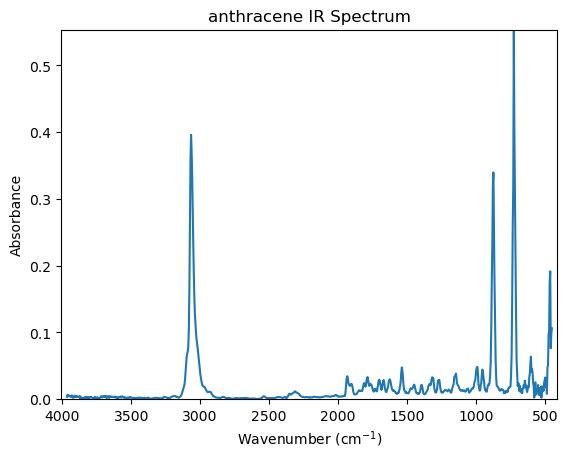

In [90]:
get_spec('anthracene')

Retrieved 1 compounds.
Getting spectrum for 1 result.
start is 26 and end is 109.
x multiplier is 1.0 and y multiplier is 2.8e-06.
spacing between lines is 4.0.


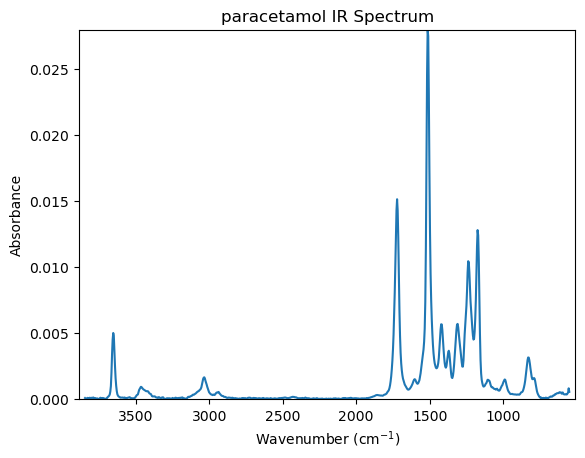

In [83]:
get_spec('paracetamol')

In [91]:
get_spec('harry_potter')

Retrieved 0 compounds.
Could not find that molecule.


Retrieved 1 compounds.
Getting spectrum for 1 result.
start is 25 and end is 113.
x multiplier is 1.0 and y multiplier is 0.000149658.
spacing between lines is 4.0.


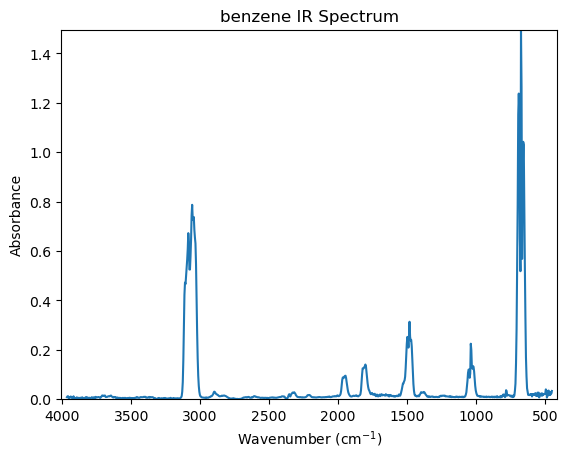

In [92]:
get_spec('benzene')